In [3]:
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt

VOWEL = {'a', 'i', 'e', 'o', 'u', 'y'}
EXC_CSN = {'ch', 'sh', 'ts'}
SIMILAR_CSN = [
    {'b', 'f', 'p', 'v'},
    {'c', 'g', 'k'},
    {'d', 't'},
    {'l'},
    {'m', 'n'},
    {'r'},
    {'s', 'sh', 'ts', 'z', 'x'},
    {'w'},
    {'h'},
    {'ch', 'j'},
    {''}
]
csn_sep = {}
for idx, ks in enumerate(SIMILAR_CSN):
    for k in ks: csn_sep[k] = idx

In [4]:
def division(s:str):
    for i in range(len(s)):
        if s[i] in VOWEL:
            return s[:i], s[i:]
    return s, '0'

In [5]:
class Syllable:
    def __init__(self, rom:str, jap:str=None) -> None:
        self.consonant, self.vowel = division(rom)
        self.rom = rom
        self.jap = jap
    
    def sim(self, other:Syllable) -> float:
        score = 0
        # consonant
        if self.consonant == other.consonant: score += 0.5
        elif csn_sep[self.consonant] == csn_sep[other.consonant]: score += 0.25
        # vowel
        if self.vowel == other.vowel: score += 0.5
        elif self.vowel[0] == other.vowel[0]: score += 0.25
        #
        return score
        
    def __repr__(self) -> str:
        return self.rom

In [6]:
def seperation(sentence:str) -> list[Syllable]:
    sentence = sentence.replace(' ', '')
    sl = []; prev = [0]; flag = 0
    def ap(idx):
        sl.append(Syllable(sentence[prev[0]:idx]))
        prev[0] = idx
    def ex_check(ch, idx):
        return (ch == 't' and sentence[idx] == 's') or \
        (ch == 'c' and sentence[idx] == 'h') or (ch == 's' and sentence[idx] == 'h')
    
    for idx, ch in enumerate(sentence, start=1):
        # print(flag, ch)
        if flag == 1:
            flag = 0; ap(idx); continue
        elif flag == 2:
            flag = 0; continue
        #
        if ch in VOWEL:
            if ch == 'y': flag = 1
            else: ap(idx)
        else:
            if flag == 3:
                flag = 0; ap(idx-1)
            #
            if ex_check(ch, idx): flag = 2
            else: flag = 3; continue
        
        if flag == 3: flag = 0
    
    if flag == 3:
        ap(len(sentence))
    
    return sl

In [7]:
def similarity_matrix(original, generated) -> np.ndarray:
    def first_eq(x, y): return x[0] == y[0]

    org, gen = seperation(original), seperation(generated)
    csn_get = np.vectorize(csn_sep.get)
    matgen = lambda x, y, b: \
        np.array([np.tile(sy.consonant if b else sy.vowel, len(y)) for sy in x])
    org_csn_mat, org_vwl_mat = matgen(org, gen, True), matgen(org, gen, False)
    gen_csn_mat, gen_vwl_mat = matgen(gen, org, True).T, matgen(gen, org, False).T

    csn_eq = (org_csn_mat == gen_csn_mat).astype(int) * 0.5
    csn_sim = (csn_get(org_csn_mat) == csn_get(gen_csn_mat)).astype(int) * 0.25
    vwl_eq = (org_vwl_mat == gen_vwl_mat).astype(int) * 0.5
    vwl_sim = (np.vectorize(first_eq)(org_vwl_mat, gen_vwl_mat)).astype(int) * 0.25
    score_mat = np.maximum(csn_eq, csn_sim) + np.maximum(vwl_eq, vwl_sim)
    
    return score_mat

In [44]:
m = similarity_matrix(\
'itteanonewatashijitsuhakiduiterunohorakimigaittakoto', 
'ano ne watakushi jitsu wa kizutsuiteru n dakedo horakun ga itta koto')

In [42]:
def mat_heatmap(mat, points=None):
    plt.imshow(mat, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap')
    plt.xticks(np.arange(0, mat.shape[1], 4))
    plt.yticks(np.arange(0, mat.shape[0], 4))
    c, r = zip(points)
    if points: plt.scatter(r, c, s=20/min(len(c), len(r)))
    plt.show()

In [42]:
seperation('shou')

[sho, u]

In [16]:
hex(ord('い'))

'0x3044'

In [51]:
# AI generated DP algo
def max_path_sum_any_start_end(matrix):
    if not matrix.size:
        return 0, []

    n, m = matrix.shape
    print(n, 'x', m)

    max_sum = float('-inf')
    max_path = []

    def find_max_path(dp, path, start_i, start_j):
        for i in range(start_i, n):
            for j in range(start_j, m):
                # 오른쪽으로 이동
                if j + 1 < m:
                    if dp[i, j] + matrix[i, j + 1] - 0.3 > dp[i, j + 1]:
                        dp[i, j + 1] = dp[i, j] + matrix[i, j + 1] - 0.3
                        path[i][j + 1] = path[i][j] + [(i, j + 1)]
                # 아래로 이동
                if i + 1 < n:
                    if dp[i, j] + matrix[i + 1, j] - 0.3 > dp[i + 1, j]:
                        dp[i + 1, j] = dp[i, j] + matrix[i + 1, j] - 0.3
                        path[i + 1][j] = path[i][j] + [(i + 1, j)]
                # 대각선 아래 오른쪽으로 이동
                if i + 1 < n and j + 1 < m:
                    if dp[i, j] + matrix[i + 1, j + 1] > dp[i + 1, j + 1]:
                        dp[i + 1, j + 1] = dp[i, j] + matrix[i + 1, j + 1]
                        path[i + 1][j + 1] = path[i][j] + [(i + 1, j + 1)]
        return dp, path

    # 행이 0인 모든 점을 시작점으로 설정
    for j in range(m):
        dp = np.full((n, m), -np.inf)
        path = [[[] for _ in range(m)] for _ in range(n)]
        dp[0, j] = matrix[0, j]
        path[0][j] = [(0, j)]
        dp, path = find_max_path(dp, path, 0, j)

        # 경계 조건에서 최대 경로 합과 경로를 갱신
        for i in range(n):
            if dp[i, m - 1] > max_sum:
                max_sum = dp[i, m - 1]
                max_path = path[i][m - 1]

    # 열이 0인 모든 점을 시작점으로 설정
    for i in range(n):
        dp = np.full((n, m), -np.inf)
        path = [[[] for _ in range(m)] for _ in range(n)]
        dp[i, 0] = matrix[i, 0]
        path[i][0] = [(i, 0)]
        dp, path = find_max_path(dp, path, i, 0)

        # 경계 조건에서 최대 경로 합과 경로를 갱신
        for j in range(m):
            if dp[n - 1, j] > max_sum:
                max_sum = dp[n - 1, j]
                max_path = path[n - 1][j]

    print("Maximum path sum:", max_sum)
    print("Accuracy: ", max_sum / min(*matrix.shape))
    print("Path:", max_path)

    return max_sum, max_path

In [52]:
max_sum, max_path = max_path_sum_any_start_end(m)

28 x 30
Maximum path sum: 21.749999999999996
Accuracy:  0.7767857142857142
Path: [(3, 0), (4, 1), (5, 2), (6, 3), (7, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (13, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (17, 17), (17, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29)]


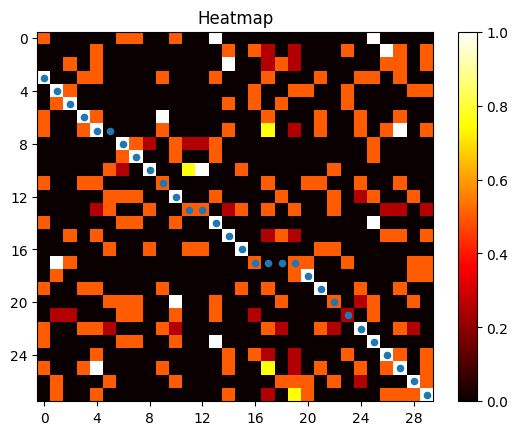

In [53]:
mat_heatmap(mat=m, points=zip(*max_path))

In [1]:
import comparison as cp
cp.seperation("hoーmu")

[ho, o, mu]